In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

car_df = pd.read_csv('CarPrice_Assignment.csv')

In [246]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [247]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [248]:
car_df = car_df.join(car_df['CarName'].str.split(' ', 1, expand=True).rename(columns={0:'CarCompany', 1:'CarModel'}))
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [249]:
#Remove the starting and leading whitespaces for string objects
str_cols = car_df.select_dtypes(['object'])
car_df[str_cols.columns] = str_cols.apply(lambda x: x.str.strip())
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [250]:
#Convert all string columns data to uppercase
car_df[str_cols.columns] = str_cols.apply(lambda x: x.str.upper())
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,ALFA-ROMERO GIULIA,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,GIULIA
1,2,3,ALFA-ROMERO STELVIO,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,STELVIO
2,3,1,ALFA-ROMERO QUADRIFOGLIO,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO
3,4,2,AUDI 100 LS,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100 LS
4,5,2,AUDI 100LS,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS


In [251]:
car_df['CarCompany'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [252]:
car_df.loc[(car_df['CarCompany']=='MAXDA'),['CarCompany']] = 'MAZDA'
car_df.loc[(car_df['CarCompany']=='PORCSHCE'),['CarCompany']] = 'PORSCHE'
car_df.loc[(car_df['CarCompany']=='TOYOUTA'),['CarCompany']] = 'TOYOTA'
car_df.loc[((car_df['CarCompany']=='VOKSWAGEN') | (car_df['CarCompany']=='VW')),['CarCompany']] = 'VOLKSWAGEN'

In [253]:
car_df['CarCompany'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [254]:
car_df=car_df.drop(['CarName'], axis=1)
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [255]:
print(car_df['symboling'].unique())
print(car_df['symboling'].value_counts())
car_df['symboling'].describe()

[ 3  1  2  0 -1 -2]
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

In [256]:
print(car_df['fueltype'].unique())
print(car_df['fueltype'].value_counts())
car_df['fueltype'].describe()

['GAS' 'DIESEL']
GAS       185
DIESEL     20
Name: fueltype, dtype: int64


count     205
unique      2
top       GAS
freq      185
Name: fueltype, dtype: object

In [257]:
car_df['fueltype'] = car_df['fueltype'].map({'GAS': 1, 'DIESEL': 0})

In [258]:
print(car_df['fueltype'].unique())
print(car_df['fueltype'].value_counts())
car_df['fueltype'].describe()

[1 0]
1    185
0     20
Name: fueltype, dtype: int64


count    205.000000
mean       0.902439
std        0.297446
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: fueltype, dtype: float64

In [259]:
print(car_df['aspiration'].unique())
print(car_df['aspiration'].value_counts())
car_df['aspiration'].describe()

['STD' 'TURBO']
STD      168
TURBO     37
Name: aspiration, dtype: int64


count     205
unique      2
top       STD
freq      168
Name: aspiration, dtype: object

In [260]:
car_df['aspiration'] = car_df['aspiration'].map({'STD' : 1, 'TURBO': 0})

In [261]:
print(car_df['aspiration'].unique())
print(car_df['aspiration'].value_counts())
car_df['aspiration'].describe()

[1 0]
1    168
0     37
Name: aspiration, dtype: int64


count    205.000000
mean       0.819512
std        0.385535
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: aspiration, dtype: float64

In [262]:
print(car_df['doornumber'].unique())
print(car_df['doornumber'].value_counts())
car_df['doornumber'].describe()

['TWO' 'FOUR']
FOUR    115
TWO      90
Name: doornumber, dtype: int64


count      205
unique       2
top       FOUR
freq       115
Name: doornumber, dtype: object

In [263]:
car_df['doornumber'] = car_df['doornumber'].map({'FOUR': 4, 'TWO': 2})

In [264]:
print(car_df['doornumber'].unique())
print(car_df['doornumber'].value_counts())
car_df['doornumber'].describe()

[2 4]
4    115
2     90
Name: doornumber, dtype: int64


count    205.000000
mean       3.121951
std        0.994966
min        2.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: doornumber, dtype: float64

In [265]:
print(car_df['carbody'].unique())
print(car_df['carbody'].value_counts())
car_df['carbody'].describe()

['CONVERTIBLE' 'HATCHBACK' 'SEDAN' 'WAGON' 'HARDTOP']
SEDAN          96
HATCHBACK      70
WAGON          25
HARDTOP         8
CONVERTIBLE     6
Name: carbody, dtype: int64


count       205
unique        5
top       SEDAN
freq         96
Name: carbody, dtype: object

In [266]:
print(car_df['drivewheel'].unique())
print(car_df['drivewheel'].value_counts())
car_df['drivewheel'].describe()

['RWD' 'FWD' '4WD']
FWD    120
RWD     76
4WD      9
Name: drivewheel, dtype: int64


count     205
unique      3
top       FWD
freq      120
Name: drivewheel, dtype: object

In [267]:
print(car_df['enginelocation'].unique())
print(car_df['enginelocation'].value_counts())
car_df['enginelocation'].describe()

['FRONT' 'REAR']
FRONT    202
REAR       3
Name: enginelocation, dtype: int64


count       205
unique        2
top       FRONT
freq        202
Name: enginelocation, dtype: object

In [268]:
car_df['enginelocation'] = car_df['enginelocation'].map({'FRONT': 1, 'REAR': 0})

In [269]:
print(car_df['enginelocation'].unique())
print(car_df['enginelocation'].value_counts())
car_df['enginelocation'].describe()

[1 0]
1    202
0      3
Name: enginelocation, dtype: int64


count    205.000000
mean       0.985366
std        0.120377
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: enginelocation, dtype: float64

In [270]:
print(car_df['enginetype'].unique())
print(car_df['enginetype'].value_counts())
car_df['enginetype'].describe()

['DOHC' 'OHCV' 'OHC' 'L' 'ROTOR' 'OHCF' 'DOHCV']
OHC      148
OHCF      15
OHCV      13
L         12
DOHC      12
ROTOR      4
DOHCV      1
Name: enginetype, dtype: int64


count     205
unique      7
top       OHC
freq      148
Name: enginetype, dtype: object

In [271]:
print(car_df['cylindernumber'].unique())
print(car_df['cylindernumber'].value_counts())
car_df['cylindernumber'].describe()

['FOUR' 'SIX' 'FIVE' 'THREE' 'TWELVE' 'TWO' 'EIGHT']
FOUR      159
SIX        24
FIVE       11
EIGHT       5
TWO         4
TWELVE      1
THREE       1
Name: cylindernumber, dtype: int64


count      205
unique       7
top       FOUR
freq       159
Name: cylindernumber, dtype: object

In [272]:
car_df['cylindernumber'] = car_df['cylindernumber'].map({'FOUR': 4, 'SIX': 6, 'FIVE': 5, 'THREE':3, 'TWELVE':12, 'TWO':2, 'EIGHT':8})

In [273]:
print(car_df['cylindernumber'].unique())
print(car_df['cylindernumber'].value_counts())
car_df['cylindernumber'].describe()

[ 4  6  5  3 12  2  8]
4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64


count    205.000000
mean       4.380488
std        1.080854
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max       12.000000
Name: cylindernumber, dtype: float64

In [274]:
print(car_df['fuelsystem'].unique())
print(car_df['fuelsystem'].value_counts())
car_df['fuelsystem'].describe()

['MPFI' '2BBL' 'MFI' '1BBL' 'SPFI' '4BBL' 'IDI' 'SPDI']
MPFI    94
2BBL    66
IDI     20
1BBL    11
SPDI     9
4BBL     3
SPFI     1
MFI      1
Name: fuelsystem, dtype: int64


count      205
unique       8
top       MPFI
freq        94
Name: fuelsystem, dtype: object

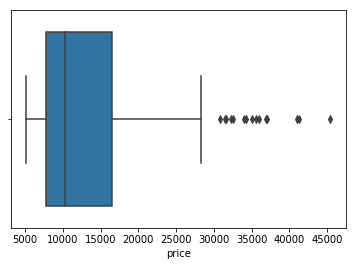

In [275]:
sns.boxplot(x=car_df['price'])

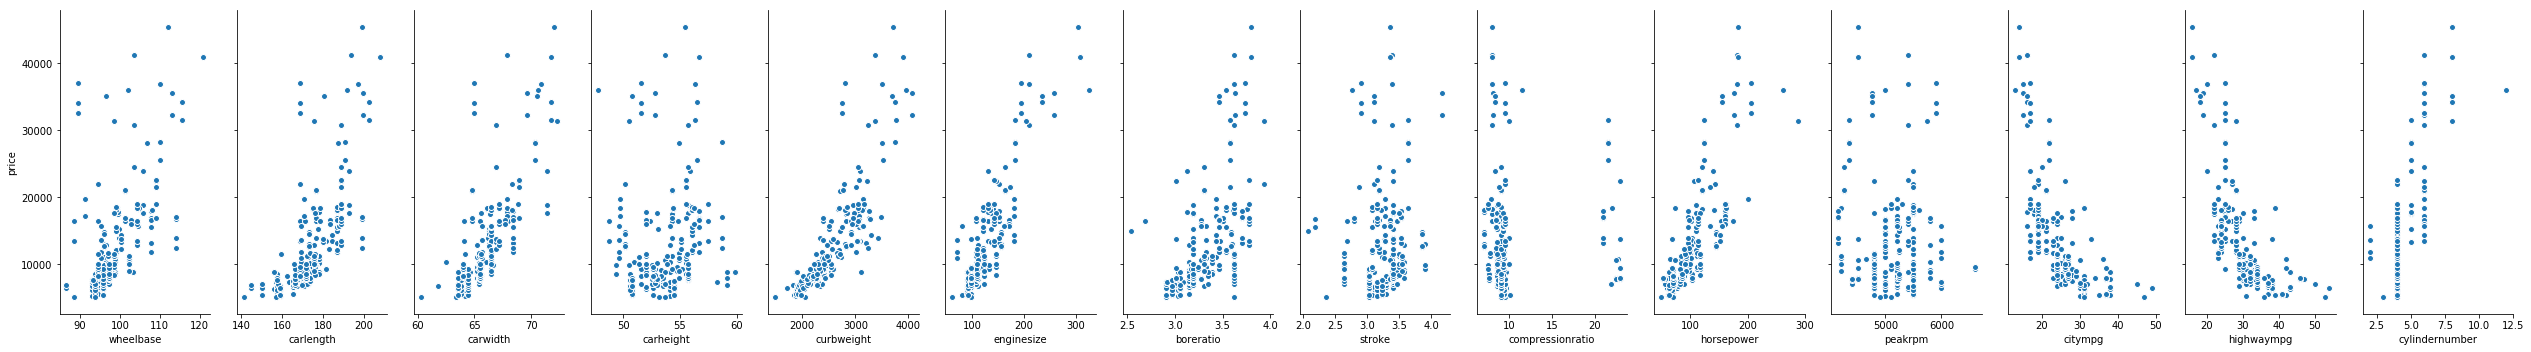

In [276]:
sns.pairplot(car_df, x_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower',
'peakrpm',           
'citympg',             
'highwaympg','cylindernumber'], y_vars='price', size=5, aspect=0.5,kind='scatter')

In [277]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg            

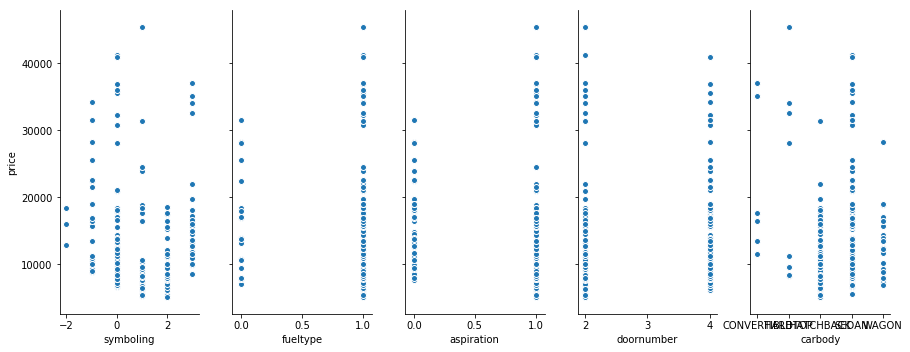

In [278]:
sns.pairplot(car_df, x_vars=['symboling','fueltype','aspiration','doornumber','carbody'], y_vars='price', size=5, aspect=0.5,kind='scatter')

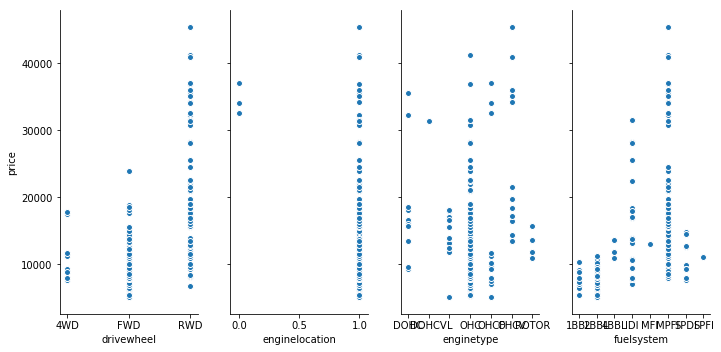

In [279]:
,
sns.pairplot(car_df, x_vars=['drivewheel','enginelocation','enginetype','fuelsystem'], y_vars='price', size=5, aspect=0.5,kind='scatter')

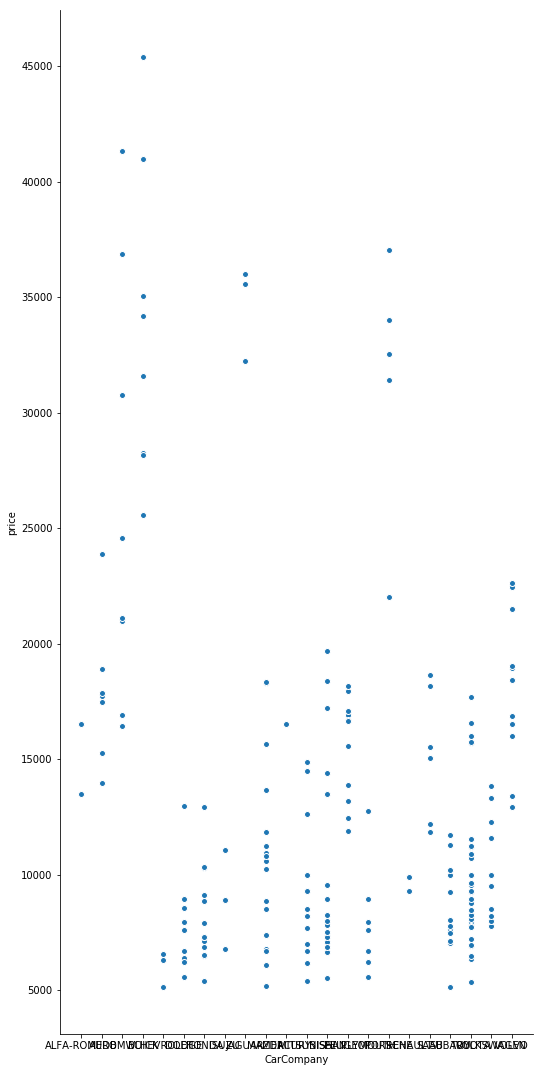

In [280]:
sns.pairplot(car_df, x_vars=['CarCompany'], y_vars='price', size=15, aspect=0.5,kind='scatter')

In [281]:
car_df['area_car'] = car_df['carlength'] * car_df['carwidth']

In [282]:
car_df['volume_car'] = car_df['carlength'] * car_df['carwidth'] * car_df['carheight']

In [283]:
car_df['weight_to_volume_ratio'] = car_df['curbweight'] / car_df['volume_car']

In [284]:
car_df['engsize_to_power_ratio'] = car_df['horsepower'] / car_df['enginesize']

In [285]:
car_df['avg_milage'] = (car_df['citympg']+car_df['highwaympg'])/2

In [286]:
car_df['weight_to_milage_ratio'] = (car_df['avg_milage']/car_df['curbweight'])

In [287]:
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,highwaympg,price,CarCompany,CarModel,area_car,volume_car,weight_to_volume_ratio,engsize_to_power_ratio,avg_milage,weight_to_milage_ratio
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,27,13495.0,ALFA-ROMERO,GIULIA,10820.08,528019.904,0.004826,0.853846,24.0,0.009419
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,27,16500.0,ALFA-ROMERO,STELVIO,10820.08,528019.904,0.004826,0.853846,24.0,0.009419
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,...,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO,11213.60,587592.640,0.004804,1.013158,22.5,0.007970
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,...,30,13950.0,AUDI,100 LS,11690.92,634816.956,0.003681,0.935780,27.0,0.011553
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,...,22,17450.0,AUDI,100LS,11726.24,636734.832,0.004435,0.845588,20.0,0.007082


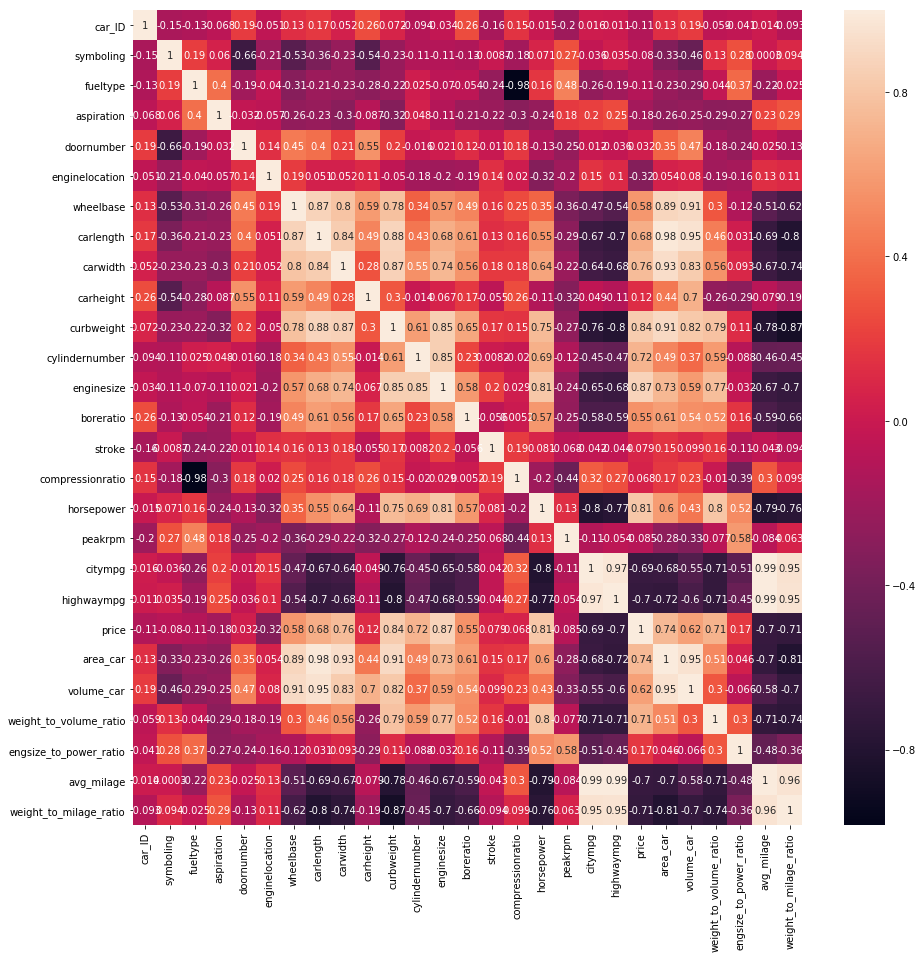

In [288]:
plt.figure(figsize = (15,15))

sns.heatmap(car_df.corr(),annot = True)

In [289]:
symboling = pd.get_dummies(car_df['symboling'],drop_first=True,prefix='symboling')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,symboling],axis=1)

In [290]:
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,volume_car,weight_to_volume_ratio,engsize_to_power_ratio,avg_milage,weight_to_milage_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,528019.904,0.004826,0.853846,24.0,0.009419,0,0,0,0,1
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,528019.904,0.004826,0.853846,24.0,0.009419,0,0,0,0,1
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,...,587592.640,0.004804,1.013158,22.5,0.007970,0,0,1,0,0
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,...,634816.956,0.003681,0.935780,27.0,0.011553,0,0,0,1,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,...,636734.832,0.004435,0.845588,20.0,0.007082,0,0,0,1,0


In [291]:
carbody = pd.get_dummies(car_df['carbody'],drop_first=True,prefix='carbody')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,carbody],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,weight_to_milage_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,0.009419,0,0,0,0,1,0,0,0,0
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,0.009419,0,0,0,0,1,0,0,0,0
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,...,0.007970,0,0,1,0,0,0,1,0,0
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,...,0.011553,0,0,0,1,0,0,0,1,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,...,0.007082,0,0,0,1,0,0,0,1,0


In [292]:
['drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

['drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

In [293]:
drivewheel = pd.get_dummies(car_df['drivewheel'],drop_first=True,prefix='drivewheel')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,drivewheel],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,1
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,1
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,...,0,1,0,0,0,1,0,0,0,1
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,...,0,0,1,0,0,0,1,0,1,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,...,0,0,1,0,0,0,1,0,0,0


In [294]:
enginetype = pd.get_dummies(car_df['enginetype'],drop_first=True,prefix='enginetype')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,enginetype],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,...,0,0,0,1,0,0,0,0,1,0
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,...,1,0,1,0,0,0,1,0,0,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,...,1,0,0,0,0,0,1,0,0,0


In [295]:
fuelsystem = pd.get_dummies(car_df['fuelsystem'],drop_first=True,prefix='fuelsystem')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,fuelsystem],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,...,0,1,0,0,0,0,0,1,0,0
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [296]:
CarCompany = pd.get_dummies(car_df['CarCompany'],drop_first=True,prefix='CarCompany')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,CarCompany],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [297]:
car_df = car_df.drop(['symboling','carbody','drivewheel','enginetype','fuelsystem','CarCompany'],axis=1)

In [298]:
car_df.head()

,car_ID,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
0,1,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,2,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,4,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,4,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


In [299]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 72 columns):
car_ID                    205 non-null int64
fueltype                  205 non-null int64
aspiration                205 non-null int64
doornumber                205 non-null int64
enginelocation            205 non-null int64
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
cylindernumber            205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     

In [300]:
car_df = car_df.drop('CarModel', axis=1)

In [301]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
car_df = car_df.apply(normalize)

In [302]:
car_df = car_df.drop('car_ID', axis=1)

In [303]:
features = car_df.columns.tolist()

In [304]:
features.remove('price')

In [305]:
# Putting feature variable to X
X = car_df[features]

# Putting response variable to y|
y = car_df['price']

In [306]:
car_df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
0,0.097561,0.180488,-0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,-0.038049,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
1,0.097561,0.180488,-0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,-0.038049,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
2,0.097561,0.180488,-0.560976,0.014634,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.161951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
3,0.097561,0.180488,0.439024,0.014634,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.038049,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
4,0.097561,0.180488,0.439024,0.014634,0.018758,0.038071,0.041016,0.047927,0.104125,0.061951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659


In [307]:
car_df.tail()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
200,0.097561,0.180488,0.439024,0.014634,0.301557,0.22016,0.249350,0.147927,0.153776,-0.038049,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,0.946341
201,0.097561,-0.819512,0.439024,0.014634,0.301557,0.22016,0.241016,0.147927,0.191402,-0.038049,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,0.946341
202,0.097561,0.180488,0.439024,0.014634,0.301557,0.22016,0.249350,0.147927,0.177050,0.161951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,0.946341
203,-0.902439,-0.819512,0.439024,0.014634,0.301557,0.22016,0.249350,0.147927,0.256569,0.161951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,0.946341
204,0.097561,-0.819512,0.439024,0.014634,0.301557,0.22016,0.249350,0.147927,0.196445,-0.038049,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,0.946341


In [308]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [309]:
from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)

In [310]:
import statsmodels.api as sm                        # Importing statsmodels
X_train = sm.add_constant(X_train)              # Adding a constant variable

In [311]:
lm = sm.OLS(y_train,X_train).fit()

In [312]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     49.57
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           9.37e-45
Time:                        14:17:00   Log-Likelihood:                 296.94
No. Observations:                 143   AIC:                            -465.9
Df Residuals:                      79   BIC:                            -276.2
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
fueltype                  -0.1029      0.105     -0.980      0.330      -0.312       0.106
aspiration                -0.0558      0.030     -1.859      0.067      -0.115       0.004
doornumber                 0.0055      0.014      0.389      0.698      -0.023       0.034
enginelocation            -0.2236      0.077     -2.902      0.005      -0.377      -0.070
wheelbase                  0.0632      0.131      0.482      0.631      -0.197       0.324
carlength                 -3.9321      1.662     -2.366      0.020      -7.240      -0.624
carwidth                  -1.6613      0.822     -2.020      0.047      -3.298      -0.024
carheight                  0.6644      0.432      1.537      0.128      -0.196       1.525
curbweight                 0.8656      1.019      0.849      0.398      -1.163       2.894
cylindernumber            -0.4771      0.332     -1.438      0.154      -1.137       0.183
enginesize                 1.1494      0.778      1.477      0.144      -0.400       2.699
boreratio                 -0.2552      0.137     -1.869      0.065      -0.527       0.017
stroke                    -0.0492      0.094     -0.526      0.600      -0.235       0.137
compressionratio          -0.2081      0.242     -0.859      0.393      -0.690       0.274
horsepower                -0.3349      0.675     -0.496      0.621      -1.679       1.009
peakrpm                    0.1353      0.057      2.392      0.019       0.023       0.248
citympg                   -0.1576      0.254     -0.622      0.536      -0.662       0.347
highwaympg                 0.0036      0.152      0.024      0.981      -0.299       0.307
area_car                   7.9004      3.003      2.631      0.010       1.923      13.878
volume_car                -2.8047      1.387     -2.022      0.047      -5.565      -0.044
weight_to_volume_ratio    -0.3304      0.788     -0.419      0.676      -1.899       1.238
engsize_to_power_ratio     0.1270      0.446      0.285      0.776      -0.760       1.014
avg_milage                -0.0758      0.136     -0.557      0.579      -0.347       0.195
weight_to_milage_ratio     0.4239      0.620      0.683      0.496      -0.811       1.658
symboling_-1               0.0365      0.048      0.764      0.447      -0.059       0.132
symboling_0                0.0279      0.061      0.460      0.647      -0.093       0.148
symboling_1                0.0091      0.061      0.148      0.883      -0.113       0.131
symboling_2                0.0224      0.059      0.377      0.707      -0.096       0.140
symboling_3               -0.0011      0.059     -0.018      0.986      -0.119       0.117
carbody_HARDTOP           -0.1127      0.060     -1.893      0.062      -0.231       0.006
carbody_HATCHBACK         -0.1104      0.046     -2.426      0.018      -0.201  

In [313]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [314]:
# Calculating Vif value
vif_cal(input_data=car_df, dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
65,CarCompany_SUBARU,inf
43,fuelsystem_IDI,inf
22,avg_milage,inf
16,citympg,inf
17,highwaympg,inf
38,enginetype_OHCF,inf
3,enginelocation,inf
18,area_car,2.411628e+04
5,carlength,6.874730e+03


In [315]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
fueltype                  205 non-null float64
aspiration                205 non-null float64
doornumber                205 non-null float64
enginelocation            205 non-null float64
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null float64
cylindernumber            205 non-null float64
enginesize                205 non-null float64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null float64
peakrpm                   205 non-null float64
citympg                   205 non-null float64
highwaympg                205 non-null float64
price                     205 non-null float64
ar

In [317]:
from sklearn.feature_selection import RFE


In [318]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
rfe = RFE(lm, 25)                   # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True False False  True False  True  True  True  True False False False
 False  True False False  True False  True  True  True False False  True
 False False False False False False False False False False False False
  True False  True False False False False  True False False False False
 False  True False  True  True False False  True False False  True  True
 False  True False  True False  True  True False False]
[ 1 16 40  1 20  1  1  1  1 11  9 12 25  1 14 13  1 31  1  1  1 22 28  1
 27 33 37 36 42 21 18 23 24 32 41 15  1 26  1 30  4 29  2  1 43 38 39 45
  6  1 19  1  1  3  7  1  5 44  1  1 35  1 10  1 17  1  1  8 34]


In [319]:
dropColumns = X_train.columns[~rfe.support_].tolist()
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO']

In [320]:
# creating X_test_10 dataframe by dropping variables from X_test
X_train_11 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_11 = sm.add_constant(X_train_11)
lm_11 = sm.OLS(y_train,X_train_11).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     106.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.31e-68
Time:                        14:17:21   Log-Likelihood:                 251.92
No. Observations:                 143   AIC:                            -455.8
Df Residuals:                     119   BIC:                            -384.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [321]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
1,enginelocation,inf
13,enginetype_OHCF,inf
14,fuelsystem_IDI,inf
23,CarCompany_SUBARU,inf
8,area_car,8864.510000
9,volume_car,2918.720000
2,carlength,2400.460000
5,curbweight,709.490000
3,carwidth,563.230000


In [322]:
dropColumns.append('fueltype')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype']

In [323]:
# creating X_test_10 dataframe by dropping variables from X_test
X_train_12 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_12 = sm.add_constant(X_train_12)
lm_12 = sm.OLS(y_train,X_train_12).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     106.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.31e-68
Time:                        14:18:09   Log-Likelihood:                 251.92
No. Observations:                 143   AIC:                            -455.8
Df Residuals:                     119   BIC:                            -384.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [324]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
22,CarCompany_SUBARU,inf
12,enginetype_OHCF,inf
7,area_car,8864.510000
8,volume_car,2918.720000
1,carlength,2400.460000
4,curbweight,709.490000
2,carwidth,563.230000
9,weight_to_volume_ratio,293.580000
3,carheight,276.820000


In [325]:
dropColumns.append('weight_to_volume_ratio')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio']

In [326]:
# creating X_test_13 dataframe by dropping variables from X_test
X_train_13 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_13 = sm.add_constant(X_train_13)
lm_13 = sm.OLS(y_train,X_train_13).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           9.77e-69
Time:                        14:19:45   Log-Likelihood:                 250.11
No. Observations:                 143   AIC:                            -454.2
Df Residuals:                     120   BIC:                            -386.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [327]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")


c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
21,CarCompany_SUBARU,inf
11,enginetype_OHCF,inf
7,area_car,8756.250000
8,volume_car,2294.090000
1,carlength,2271.840000
2,carwidth,533.310000
3,carheight,272.080000
9,weight_to_milage_ratio,94.480000
5,compressionratio,59.520000


In [328]:
dropColumns.append('compressionratio')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio']

In [329]:
# creating X_test_13 dataframe by dropping variables from X_test
X_train_14 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_14 = sm.add_constant(X_train_14)
lm_14 = sm.OLS(y_train,X_train_14).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     114.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.61e-69
Time:                        14:20:19   Log-Likelihood:                 249.41
No. Observations:                 143   AIC:                            -454.8
Df Residuals:                     121   BIC:                            -389.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [330]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")


c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
20,CarCompany_SUBARU,inf
10,enginetype_OHCF,inf
6,area_car,8747.670000
7,volume_car,2289.420000
1,carlength,2258.080000
2,carwidth,530.680000
3,carheight,271.840000
8,weight_to_milage_ratio,94.350000
5,citympg,55.650000


In [331]:
dropColumns.append('CarCompany_CHEVROLET')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET']

In [332]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_15 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_15 = sm.add_constant(X_train_15)
lm_15 = sm.OLS(y_train,X_train_15).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     119.9
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.57e-70
Time:                        14:20:59   Log-Likelihood:                 248.73
No. Observations:                 143   AIC:                            -455.5
Df Residuals:                     122   BIC:                            -393.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [333]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")


c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
19,CarCompany_SUBARU,inf
10,enginetype_OHCF,inf
6,area_car,8527.260000
7,volume_car,2238.810000
1,carlength,2220.050000
2,carwidth,517.890000
3,carheight,266.700000
8,weight_to_milage_ratio,90.740000
5,citympg,55.100000


In [334]:
dropColumns.append('CarCompany_JAGUAR')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR']

In [335]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_16 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_16 = sm.add_constant(X_train_16)
lm_16 = sm.OLS(y_train,X_train_16).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     125.5
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           5.01e-71
Time:                        14:21:30   Log-Likelihood:                 247.79
No. Observations:                 143   AIC:                            -455.6
Df Residuals:                     123   BIC:                            -396.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [336]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
18,CarCompany_SUBARU,inf
10,enginetype_OHCF,inf
6,area_car,7187.340000
1,carlength,2101.890000
7,volume_car,1600.140000
2,carwidth,479.190000
3,carheight,196.400000
8,weight_to_milage_ratio,89.030000
5,citympg,54.950000


In [337]:
dropColumns.append('CarCompany_PLYMOUTH')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH']

In [338]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_17 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_17 = sm.add_constant(X_train_17)
lm_17 = sm.OLS(y_train,X_train_17).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.36e-71
Time:                        14:21:52   Log-Likelihood:                 246.44
No. Observations:                 143   AIC:                            -454.9
Df Residuals:                     124   BIC:                            -398.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [339]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
17,CarCompany_SUBARU,inf
10,enginetype_OHCF,inf
6,area_car,7184.460000
1,carlength,2099.980000
7,volume_car,1579.110000
2,carwidth,478.190000
3,carheight,192.950000
8,weight_to_milage_ratio,88.360000
5,citympg,54.480000


In [340]:
dropColumns.append('CarCompany_NISSAN')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN']

In [341]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_18 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_18 = sm.add_constant(X_train_18)
lm_18 = sm.OLS(y_train,X_train_18).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     136.7
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           4.09e-72
Time:                        14:22:18   Log-Likelihood:                 244.96
No. Observations:                 143   AIC:                            -453.9
Df Residuals:                     125   BIC:                            -400.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [342]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
16,CarCompany_SUBARU,inf
10,enginetype_OHCF,inf
6,area_car,7131.740000
1,carlength,2052.570000
7,volume_car,1571.550000
2,carwidth,470.620000
3,carheight,191.970000
8,weight_to_milage_ratio,86.180000
5,citympg,53.720000


In [343]:
dropColumns.append('CarCompany_DODGE')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE']

In [344]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_19 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_19 = sm.add_constant(X_train_19)
lm_19 = sm.OLS(y_train,X_train_19).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     143.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.15e-72
Time:                        14:22:44   Log-Likelihood:                 243.54
No. Observations:                 143   AIC:                            -453.1
Df Residuals:                     126   BIC:                            -402.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [345]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
15,CarCompany_SUBARU,inf
10,enginetype_OHCF,inf
6,area_car,7119.940000
1,carlength,2047.350000
7,volume_car,1510.170000
2,carwidth,469.410000
3,carheight,183.470000
8,weight_to_milage_ratio,85.840000
5,citympg,53.650000


In [346]:
dropColumns.append('CarCompany_TOYOTA')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 

In [347]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_20 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_20 = sm.add_constant(X_train_20)
lm_20 = sm.OLS(y_train,X_train_20).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           5.51e-73
Time:                        14:23:10   Log-Likelihood:                 241.50
No. Observations:                 143   AIC:                            -451.0
Df Residuals:                     127   BIC:                            -403.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [348]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
10,enginetype_OHCF,inf
15,CarCompany_SUBARU,inf
6,area_car,6744.460000
1,carlength,1979.800000
7,volume_car,1419.340000
2,carwidth,451.280000
3,carheight,173.710000
8,weight_to_milage_ratio,74.570000
5,citympg,45.310000


In [349]:
dropColumns.append('carheight')

In [350]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_21 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_21 = sm.add_constant(X_train_21)
lm_21 = sm.OLS(y_train,X_train_21).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     156.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.96e-73
Time:                        14:23:46   Log-Likelihood:                 239.32
No. Observations:                 143   AIC:                            -448.6
Df Residuals:                     128   BIC:                            -404.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.75

In [351]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
9,enginetype_OHCF,inf
14,CarCompany_SUBARU,inf
5,area_car,3282.620000
1,carlength,1562.200000
2,carwidth,361.720000
7,weight_to_milage_ratio,71.590000
4,citympg,44.410000
6,volume_car,17.190000
3,curbweight,14.850000


In [352]:
dropColumns.append('carwidth')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 

In [353]:
# creating X_test_22 dataframe by dropping variables from X_test
X_train_22 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_22 = sm.add_constant(X_train_22)
lm_22 = sm.OLS(y_train,X_train_22).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     166.2
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           7.89e-74
Time:                        14:24:13   Log-Likelihood:                 237.91
No. Observations:                 143   AIC:                            -447.8
Df Residuals:                     129   BIC:                            -406.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [354]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
8,enginetype_OHCF,inf
13,CarCompany_SUBARU,inf
4,area_car,53.610000
6,weight_to_milage_ratio,46.690000
1,carlength,41.800000
3,citympg,35.430000
5,volume_car,15.700000
2,curbweight,11.300000
9,fuelsystem_IDI,2.750000


In [359]:
dropColumns.append('volume_car')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 

In [360]:
# creating X_test_23 dataframe by dropping variables from X_test
X_train_23 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_23 = sm.add_constant(X_train_23)
lm_23 = sm.OLS(y_train,X_train_23).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.06e-73
Time:                        14:25:33   Log-Likelihood:                 234.69
No. Observations:                 143   AIC:                            -443.4
Df Residuals:                     130   BIC:                            -404.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [361]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
7,enginetype_OHCF,inf
12,CarCompany_SUBARU,inf
4,area_car,46.340000
5,weight_to_milage_ratio,45.870000
1,carlength,39.290000
3,citympg,34.050000
2,curbweight,10.970000
8,fuelsystem_IDI,2.740000
6,enginetype_L,1.190000


In [362]:
dropColumns.append('CarCompany_RENAULT')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 

In [363]:
# creating X_test_23 dataframe by dropping variables from X_test
X_train_24 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_24 = sm.add_constant(X_train_24)
lm_24 = sm.OLS(y_train,X_train_24).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           9.77e-74
Time:                        14:25:48   Log-Likelihood:                 231.87
No. Observations:                 143   AIC:                            -439.7
Df Residuals:                     131   BIC:                            -404.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [364]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,enginelocation,inf
7,enginetype_OHCF,inf
11,CarCompany_SUBARU,inf
4,area_car,46.320000
5,weight_to_milage_ratio,45.840000
1,carlength,39.280000
3,citympg,34.000000
2,curbweight,10.900000
8,fuelsystem_IDI,2.740000
6,enginetype_L,1.190000


In [365]:
dropColumns.append('CarCompany_SUBARU')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 

In [366]:
# creating X_test_25 dataframe by dropping variables from X_test
X_train_25 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_25 = sm.add_constant(X_train_25)
lm_25 = sm.OLS(y_train,X_train_25).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           9.77e-74
Time:                        14:26:10   Log-Likelihood:                 231.87
No. Observations:                 143   AIC:                            -439.7
Df Residuals:                     131   BIC:                            -404.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [367]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
4,area_car,46.32
5,weight_to_milage_ratio,45.84
1,carlength,39.28
3,citympg,34.00
2,curbweight,10.90
8,fuelsystem_IDI,2.74
0,enginelocation,1.41
7,enginetype_OHCF,1.34
6,enginetype_L,1.19
9,CarCompany_BMW,1.13


In [368]:
dropColumns.append('enginetype_OHCF')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 

In [369]:
# creating X_test_26 dataframe by dropping variables from X_test
X_train_26 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_26 = sm.add_constant(X_train_26)
lm_26 = sm.OLS(y_train,X_train_26).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     202.0
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           7.08e-75
Time:                        14:26:28   Log-Likelihood:                 231.81
No. Observations:                 143   AIC:                            -441.6
Df Residuals:                     132   BIC:                            -409.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [370]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
4,area_car,46.21
5,weight_to_milage_ratio,43.32
1,carlength,39.00
3,citympg,32.66
2,curbweight,10.71
7,fuelsystem_IDI,2.69
6,enginetype_L,1.19
0,enginelocation,1.14
8,CarCompany_BMW,1.13
9,CarCompany_MITSUBISHI,1.04


In [371]:
dropColumns.append('carlength')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 

In [372]:
# creating X_test_26 dataframe by dropping variables from X_test
X_train_27 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_27 = sm.add_constant(X_train_27)
lm_27 = sm.OLS(y_train,X_train_27).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           3.15e-68
Time:                        14:27:12   Log-Likelihood:                 212.32
No. Observations:                 143   AIC:                            -404.6
Df Residuals:                     133   BIC:                            -375.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [373]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
4,weight_to_milage_ratio,34.80
2,citympg,27.85
1,curbweight,9.43
3,area_car,6.35
6,fuelsystem_IDI,2.54
5,enginetype_L,1.17
0,enginelocation,1.13
7,CarCompany_BMW,1.05
8,CarCompany_MITSUBISHI,1.04


In [374]:
dropColumns.append('area_car')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 

In [375]:
# creating X_test_28 dataframe by dropping variables from X_test
X_train_28 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_28 = sm.add_constant(X_train_28)
lm_28 = sm.OLS(y_train,X_train_28).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.15e-68
Time:                        14:27:44   Log-Likelihood:                 209.88
No. Observations:                 143   AIC:                            -401.8
Df Residuals:                     134   BIC:                            -375.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [242]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
3,weight_to_milage_ratio,33.62
2,citympg,27.40
1,curbweight,6.10
5,fuelsystem_IDI,2.54
4,enginetype_L,1.16
0,enginelocation,1.07
6,CarCompany_BMW,1.05
7,CarCompany_MITSUBISHI,1.03


In [376]:
dropColumns.append('citympg')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 

In [377]:
# creating X_test_29 dataframe by dropping variables from X_test
X_train_29 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_29 = sm.add_constant(X_train_29)
lm_29 = sm.OLS(y_train,X_train_29).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_29.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           7.34e-58
Time:                        14:28:05   Log-Likelihood:                 181.19
No. Observations:                 143   AIC:                            -346.4
Df Residuals:                     135   BIC:                            -322.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [378]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
1,curbweight,5.90
2,weight_to_milage_ratio,5.48
4,fuelsystem_IDI,1.35
3,enginetype_L,1.16
5,CarCompany_BMW,1.04
0,enginelocation,1.02
6,CarCompany_MITSUBISHI,1.02


In [379]:
dropColumns.remove('engsize_to_power_ratio')
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 'CarCompany_TOYOTA',
 'carh

In [380]:
# creating X_test_30 dataframe by dropping variables from X_test
X_train_30 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_30 = sm.add_constant(X_train_30)
lm_30 = sm.OLS(y_train,X_train_30).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_30.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.56e-60
Time:                        14:35:15   Log-Likelihood:                 189.95
No. Observations:                 143   AIC:                            -361.9
Df Residuals:                     134   BIC:                            -335.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [385]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
3,weight_to_milage_ratio,6.26
1,curbweight,5.77
2,engsize_to_power_ratio,1.46
4,enginetype_L,1.14
5,CarCompany_BMW,1.04
0,enginelocation,1.03
6,CarCompany_MITSUBISHI,1.03


In [382]:
dropColumns.append('fuelsystem_IDI')

In [383]:
dropColumns

['aspiration',
 'doornumber',
 'wheelbase',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_PORSCHE',
 'CarCompany_SAAB',
 'CarCompany_VOLKSWAGEN',
 'CarCompany_VOLVO',
 'fueltype',
 'weight_to_volume_ratio',
 'compressionratio',
 'CarCompany_CHEVROLET',
 'CarCompany_JAGUAR',
 'CarCompany_PLYMOUTH',
 'CarCompany_NISSAN',
 'CarCompany_DODGE',
 'CarCompany_TOYOTA',
 'carh

In [384]:
# creating X_test_31 dataframe by dropping variables from X_test
X_train_31 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_31 = sm.add_constant(X_train_31)
lm_31 = sm.OLS(y_train,X_train_31).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     155.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.09e-61
Time:                        14:35:45   Log-Likelihood:                 189.89
No. Observations:                 143   AIC:                            -363.8
Df Residuals:                     135   BIC:                            -340.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [386]:
dropColumns.append('CarCompany_MITSUBISHI')


In [387]:
# creating X_test_32 dataframe by dropping variables from X_test
X_train_32 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_32 = sm.add_constant(X_train_32)
lm_32 = sm.OLS(y_train,X_train_32).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           8.67e-62
Time:                        14:36:26   Log-Likelihood:                 188.02
No. Observations:                 143   AIC:                            -362.0
Df Residuals:                     136   BIC:                            -341.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [388]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
3,weight_to_milage_ratio,6.23
1,curbweight,5.72
2,engsize_to_power_ratio,1.46
4,enginetype_L,1.14
5,CarCompany_BMW,1.04
0,enginelocation,1.03


In [389]:
dropColumns.append('weight_to_milage_ratio')


In [390]:
# creating X_test_33 dataframe by dropping variables from X_test
X_train_33 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_33 = sm.add_constant(X_train_33)
lm_33 = sm.OLS(y_train,X_train_33).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_33.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     166.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.26e-56
Time:                        14:37:08   Log-Likelihood:                 172.10
No. Observations:                 143   AIC:                            -332.2
Df Residuals:                     137   BIC:                            -314.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [391]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
1,curbweight,1.12
3,enginetype_L,1.10
2,engsize_to_power_ratio,1.06
0,enginelocation,1.03
4,CarCompany_BMW,1.03


In [392]:
dropColumns.remove('volume_car')


In [393]:
# creating X_test_34 dataframe by dropping variables from X_test
X_train_34 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_34 = sm.add_constant(X_train_34)
lm_34 = sm.OLS(y_train,X_train_34).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_34.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           8.45e-56
Time:                        14:37:44   Log-Likelihood:                 173.46
No. Observations:                 143   AIC:                            -332.9
Df Residuals:                     136   BIC:                            -312.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [394]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
2,volume_car,3.56
1,curbweight,3.45
4,enginetype_L,1.14
3,engsize_to_power_ratio,1.12
0,enginelocation,1.06
5,CarCompany_BMW,1.03


In [395]:
dropColumns.append('curbweight')

In [396]:
# creating X_test_35 dataframe by dropping variables from X_test
X_train_35 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_35 = sm.add_constant(X_train_35)
lm_35 = sm.OLS(y_train,X_train_35).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_35.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     44.45
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           4.52e-27
Time:                        14:38:14   Log-Likelihood:                 101.17
No. Observations:                 143   AIC:                            -190.3
Df Residuals:                     137   BIC:                            -172.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [397]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
1,volume_car,1.16
3,enginetype_L,1.14
2,engsize_to_power_ratio,1.04
0,enginelocation,1.03
4,CarCompany_BMW,1.03


In [399]:
dropColumns.remove('avg_milage')


In [400]:
# creating X_test_35 dataframe by dropping variables from X_test
X_train_36 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_36 = sm.add_constant(X_train_36)
lm_36 = sm.OLS(y_train,X_train_36).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_36.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     46.29
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.54e-30
Time:                        14:44:28   Log-Likelihood:                 111.79
No. Observations:                 143   AIC:                            -209.6
Df Residuals:                     136   BIC:                            -188.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [401]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
3,avg_milage,2.72
1,volume_car,2.30
2,engsize_to_power_ratio,1.70
4,enginetype_L,1.17
0,enginelocation,1.06
5,CarCompany_BMW,1.04


In [404]:
dropColumns.remove('enginesize')
dropColumns.remove('fueltype')
dropColumns.remove('CarCompany_PORSCHE')
dropColumns.append('avg_milage')
dropColumns.append('enginetype_L')



In [450]:
# creating X_test_35 dataframe by dropping variables from X_test
X_train_37 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_37 = sm.add_constant(X_train_37)
lm_37 = sm.OLS(y_train,X_train_37).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_37.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     179.2
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.34e-53
Time:                        15:42:03   Log-Likelihood:                 162.62
No. Observations:                 143   AIC:                            -315.2
Df Residuals:                     138   BIC:                            -300.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [451]:
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,1.71
2,volume_car,1.65
0,enginelocation,1.14
3,engsize_to_power_ratio,1.03


In [449]:
dropColumns.append('CarCompany_BMW')


In [439]:
car_df[car_df.CarCompany_PORSCHE!=-0.02439]

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
0,0.097561,0.180488,-0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,-0.038049,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
1,0.097561,0.180488,-0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,-0.038049,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
2,0.097561,0.180488,-0.560976,0.014634,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.161951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
3,0.097561,0.180488,0.439024,0.014634,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.038049,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
4,0.097561,0.180488,0.439024,0.014634,0.018758,0.038071,0.041016,0.047927,0.104125,0.061951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
5,0.097561,0.180488,-0.560976,0.014634,0.030420,0.048518,0.032683,-0.052073,-0.018839,0.061951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
6,0.097561,0.180488,0.439024,0.014634,0.205347,0.278369,0.457683,0.164593,0.111883,0.061951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
7,0.097561,0.180488,0.439024,0.014634,0.205347,0.278369,0.457683,0.164593,0.154552,0.061951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
8,0.097561,-0.819512,0.439024,0.014634,0.205347,0.278369,0.457683,0.181260,0.205754,0.061951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
9,0.097561,-0.819512,-0.560976,0.014634,0.021674,0.061951,0.166016,-0.143740,0.192954,0.061951,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659


In [632]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=120)

In [633]:
# creating X_test_35 dataframe by dropping variables from X_test
X1_train_1 = X1_train.drop(dropColumns, 1)
# Adding a constant variable
X1_train_1 = sm.add_constant(X1_train_1)
lm_36 = sm.OLS(y1_train,X1_train_1).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_36.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     159.5
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           5.23e-59
Time:                        01:31:17   Log-Likelihood:                 182.06
No. Observations:                 143   AIC:                            -350.1
Df Residuals:                     136   BIC:                            -329.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [635]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=90)

In [636]:
# creating X_test_35 dataframe by dropping variables from X_test
X2_train_1 = X2_train.drop(dropColumns, 1)
# Adding a constant variable
X2_train_1 = sm.add_constant(X2_train_1)
lm_36 = sm.OLS(y2_train,X2_train_1).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_36.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.74e-59
Time:                        01:34:16   Log-Likelihood:                 179.06
No. Observations:                 143   AIC:                            -344.1
Df Residuals:                     136   BIC:                            -323.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [640]:
y_test

160   -0.137498
186   -0.118706
59    -0.110017
165   -0.098771
140   -0.140850
64    -0.050437
198    0.127682
75     0.080093
172    0.109039
104    0.097371
200    0.088583
136    0.120979
111    0.057179
41    -0.008235
73     0.687237
31    -0.159419
156   -0.157358
133   -0.027474
65     0.124207
83     0.039529
195    0.003433
197    0.080390
126    0.477913
118   -0.191269
167   -0.119848
101    0.005518
124   -0.012728
69     0.369875
11     0.090569
46    -0.055328
         ...   
110    0.014480
201    0.143198
115    0.083245
174   -0.064016
134    0.043774
169   -0.081617
92    -0.159568
173   -0.107460
74     0.797460
3      0.016714
157   -0.150904
81    -0.118607
32    -0.195564
99    -0.107435
26    -0.140701
88    -0.099243
184   -0.131118
187   -0.093881
52    -0.160908
168   -0.090306
164   -0.125086
188   -0.081468
7      0.140095
158   -0.133526
123   -0.108130
28    -0.108130
29    -0.007763
182   -0.136580
40    -0.074021
128    0.589625
Name: price, Length: 62,

In [656]:
X_test_35 = X_test.drop(dropColumns, axis=1)

X_test_35 = sm.add_constant(X_test_35)

In [657]:
y_pred = lm_35.predict(X_test_35)

Text(0,0.5,'Housing Price')

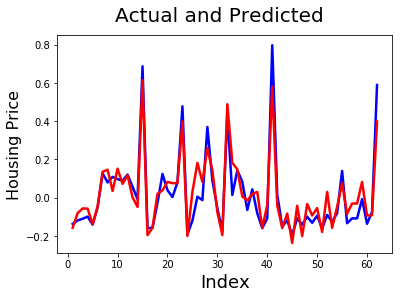

In [658]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0,0.5,'ytest-ypred')

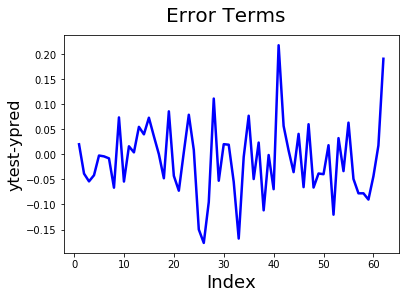

In [659]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'y_pred')

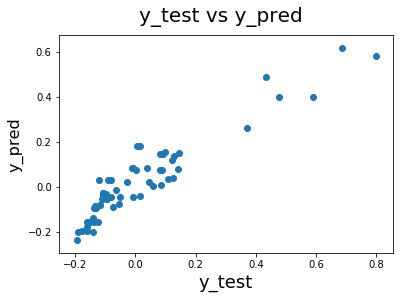

In [660]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'Index')

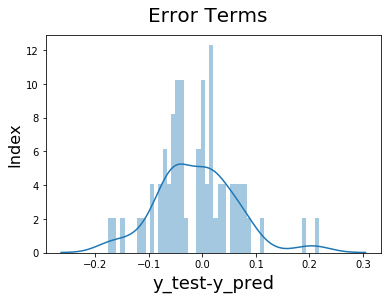

In [663]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label